# EDA on Instragram Posts I Liked from 2015-2020:
I have extracted data from my Instagram account and tried to get insides on my likes on a particular account.

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import json 
from datetime import datetime
import datetime 
import calendar 

In [2]:
# Opening JSON file 
# To display all the rows
pd.set_option('display.max_rows', None)
f = open('likes_insta.json') 

f=f.read()

print(f)

{"media_likes": [["2020-08-15T14:49:24+00:00", "mahi7781"], ["2020-08-03T13:26:53+00:00", "the.tharki.sperm"], ["2020-08-02T22:29:59+00:00", "anneyshathakker"], ["2020-07-30T20:31:55+00:00", "praneetareddy19"], ["2020-07-19T20:02:45+00:00", "sindhu_kannan_"], ["2020-07-19T18:23:37+00:00", "praneetareddy19"], ["2020-07-13T19:40:21+00:00", "sarcastic.joker"], ["2020-06-30T19:19:55+00:00", "typical_type_o"], ["2020-06-23T19:05:15+00:00", "bibi_ayesha_s"], ["2020-06-23T14:55:10+00:00", "samimmolla70"], ["2020-06-21T06:12:55+00:00", "praneetareddy19"], ["2020-06-20T21:05:41+00:00", "shilpa_m_g"], ["2020-06-16T20:24:59+00:00", "sindhu_kannan_"], ["2020-06-16T20:24:53+00:00", "shilpa_m_g"], ["2020-06-16T07:46:52+00:00", "shilpa_m_g"], ["2020-06-16T07:46:09+00:00", "praneetareddy19"], ["2020-06-09T21:36:38+00:00", "megasonic_dpool"], ["2020-06-08T19:33:21+00:00", "ghantaa"], ["2020-06-08T19:28:26+00:00", "_dekhbhai_"], ["2020-06-07T21:46:58+00:00", "sayed_samiya42"], ["2020-06-03T18:30:17+00:0

In [3]:
# Parse the date to convert from string to JavaObject
obj = json.loads(f)
i=[]
for x in obj["media_likes"]:
    i.append(x)

df = pd.DataFrame(i)

In [4]:
# To print top 5 rows
df.head()

,0,1
0,2020-08-15T14:49:24+00:00,mahi7781
1,2020-08-03T13:26:53+00:00,the.tharki.sperm
2,2020-08-02T22:29:59+00:00,anneyshathakker
3,2020-07-30T20:31:55+00:00,praneetareddy19
4,2020-07-19T20:02:45+00:00,sindhu_kannan_


In [5]:
# To print bottom 5 rows
df.tail()

,0,1
11172,2015-10-31T18:05:26+00:00,i_admire_imran
11173,2015-10-27T10:00:29+00:00,nikhil.arukar07
11174,2015-10-26T08:38:18+00:00,itscheche29
11175,2015-05-17T09:01:20+00:00,itscheche29
11176,2015-05-17T09:01:12+00:00,itscheche29


In [6]:
# To find dtypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       11177 non-null  object
 1   1       11177 non-null  object
dtypes: object(2)
memory usage: 174.8+ KB


- Column "0" which sholud be in **datetime dtype** but is in **object dtype**

In [7]:
# To convert Object to DateTime dtype
df[0] = pd.to_datetime(df[0]) 

In [8]:
# To find dtypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   0       11177 non-null  datetime64[ns, UTC]
 1   1       11177 non-null  object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 174.8+ KB


In [9]:
# Renaming the column names for better understanding
df.rename(columns = {0:'date_time',1:'username'}, inplace = True) 
df.head()

,date_time,username
0,2020-08-15 14:49:24+00:00,mahi7781
1,2020-08-03 13:26:53+00:00,the.tharki.sperm
2,2020-08-02 22:29:59+00:00,anneyshathakker
3,2020-07-30 20:31:55+00:00,praneetareddy19
4,2020-07-19 20:02:45+00:00,sindhu_kannan_


In [10]:
# Verifing rename of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date_time  11177 non-null  datetime64[ns, UTC]
 1   username   11177 non-null  object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 174.8+ KB


In [11]:
# To find any missing values
df.isnull().sum()

date_time    0
username     0
dtype: int64

- There are **no missing values**

In [12]:
# Number of likes for the year
df['date_time'].groupby(df['date_time'].dt.year).count()

date_time
2015      67
2016    5936
2017    3793
2018     999
2019     288
2020      94
Name: date_time, dtype: int64

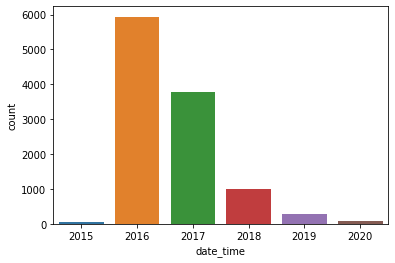

In [13]:
# Count plot for likes in a year
sns.countplot(x=df['date_time'].dt.year)
plt.show()

- From the above plot we can say that:
- I have **liked 5936 posts** in the **year 2016** which is the **highest** among the years
- I have **liked 67 posts** in the **year 2015** which is the **lowest** among the years

In [14]:
# Number of likes for the month
df['date_time'].groupby(df['date_time'].dt.month).count()

date_time
1     1094
2      683
3      644
4      686
5     1629
6     1455
7      840
8      724
9      989
10     573
11     759
12    1101
Name: date_time, dtype: int64

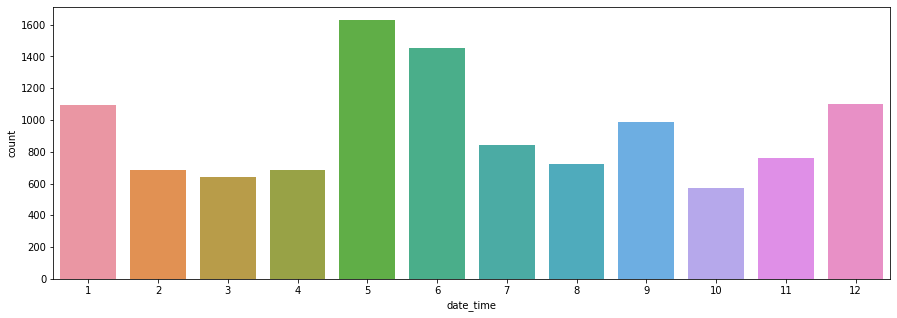

In [15]:
# Count plot for likes in a year
plt.figure(figsize=(15,5))
sns.countplot(x=df['date_time'].dt.month)
plt.show()

- I have **liked 1629 posts** in the **month of May(5)** from the **year 2015-2020**
- I have **liked 573 posts** in the **month of October(10)** from the **year 2015-2020**

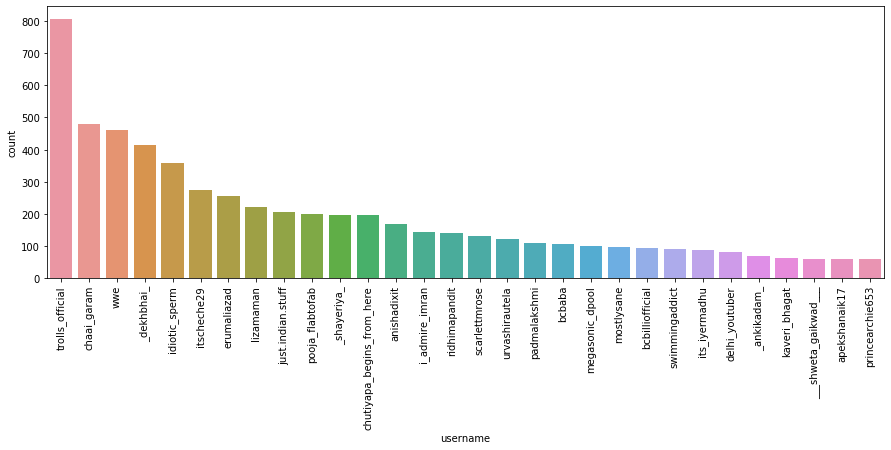

In [16]:
# Top 30 likes on account
df1 = df['username'].groupby(df['username']).count().reset_index(name='count').sort_values(['count'], ascending=False) # Total number of post per account is descending order and storted in the new Df as df1
plt.figure(figsize=(15,5))
sns.barplot(df1['username'].head(30),df1['count'])
plt.xticks(rotation=90)
plt.show()

In [17]:
# To extract time from date_time column
df['Time']=df['date_time'].dt.time
df['Time'].head()

0    14:49:24
1    13:26:53
2    22:29:59
3    20:31:55
4    20:02:45
Name: Time, dtype: object

In [18]:
# To check dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date_time  11177 non-null  datetime64[ns, UTC]
 1   username   11177 non-null  object             
 2   Time       11177 non-null  object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 262.1+ KB


In [19]:
# To convert column 'Time' to string
a=[]
for i in df['Time']:
    a.append(i.strftime("%H:%M:%S"))  
    
df['time'] = a

In [20]:
# Top 5 rows
df.head()

,date_time,username,Time,time
0,2020-08-15 14:49:24+00:00,mahi7781,14:49:24,14:49:24
1,2020-08-03 13:26:53+00:00,the.tharki.sperm,13:26:53,13:26:53
2,2020-08-02 22:29:59+00:00,anneyshathakker,22:29:59,22:29:59
3,2020-07-30 20:31:55+00:00,praneetareddy19,20:31:55,20:31:55
4,2020-07-19 20:02:45+00:00,sindhu_kannan_,20:02:45,20:02:45


In [21]:
# Function to bin 24Hr into 4 equal parts
# 00Hr to 06Hr --> Night
# 06Hr to 12Hr --> Morning
# 12Hr to 18Hr --> Afternoon
# 18Hr to 24Hr --> Evening

def bin_time(x):
    if (x >= "06:00:00") and (x <= "11:59:59"):
        return "Morning"
    elif (x >= "12:00:00") and (x <= "17:59:59"):
        return "Afternoon"
    elif (x >= "18:00:00") and (x <= "23:59:59"):
        return "Evening"
    else:
        return "Night"

In [22]:
# Applying the bin_time funtion on the column 'time'
df['bin_time']=df['time'].apply(bin_time)

In [23]:
# To see the top 5 columns
df.head()

,date_time,username,Time,time,bin_time
0,2020-08-15 14:49:24+00:00,mahi7781,14:49:24,14:49:24,Afternoon
1,2020-08-03 13:26:53+00:00,the.tharki.sperm,13:26:53,13:26:53,Afternoon
2,2020-08-02 22:29:59+00:00,anneyshathakker,22:29:59,22:29:59,Evening
3,2020-07-30 20:31:55+00:00,praneetareddy19,20:31:55,20:31:55,Evening
4,2020-07-19 20:02:45+00:00,sindhu_kannan_,20:02:45,20:02:45,Evening


In [24]:
# Count of values in the column bin_time
df['bin_time'].value_counts()

Afternoon    4745
Morning      2943
Night        2035
Evening      1454
Name: bin_time, dtype: int64

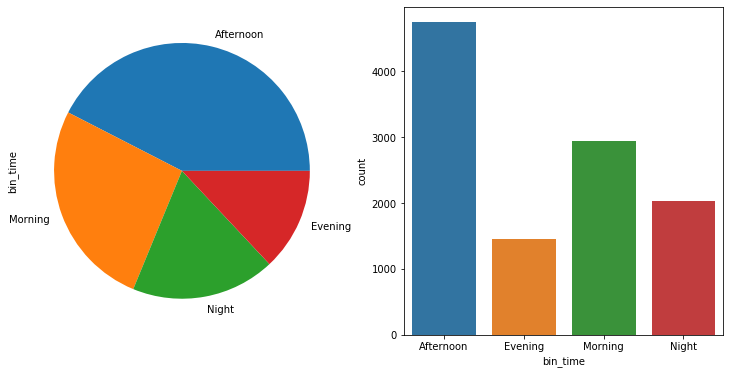

In [25]:
# Pie Chart and Bar plot for the column bin_time
f,ax=plt.subplots(1,2,figsize=(10,5))
df['bin_time'].value_counts().plot(kind='pie', ax=ax[0]) #ax=ax[0] -> to get it on first
#plt.pie(df['bin_time'].value_counts(),labels=df['bin_time'].value_counts().index,explode=[0.2,0,0,0])
sns.countplot(df['bin_time'], ax=ax[1])  #ax=ax[1] -> to get it second
f.tight_layout(pad=0)
plt.show()


- I have **liked most** of the post in the **afternoon**
- I have **liked least** no. of post in the **evening**

In [26]:
# Top 5 row
df.head()

,date_time,username,Time,time,bin_time
0,2020-08-15 14:49:24+00:00,mahi7781,14:49:24,14:49:24,Afternoon
1,2020-08-03 13:26:53+00:00,the.tharki.sperm,13:26:53,13:26:53,Afternoon
2,2020-08-02 22:29:59+00:00,anneyshathakker,22:29:59,22:29:59,Evening
3,2020-07-30 20:31:55+00:00,praneetareddy19,20:31:55,20:31:55,Evening
4,2020-07-19 20:02:45+00:00,sindhu_kannan_,20:02:45,20:02:45,Evening


In [27]:
#df['Time']=df['date_time'].dt.time
df['date_time'].dt.date

0        2020-08-15
1        2020-08-03
2        2020-08-02
3        2020-07-30
4        2020-07-19
            ...    
11172    2015-10-31
11173    2015-10-27
11174    2015-10-26
11175    2015-05-17
11176    2015-05-17
Name: date_time, Length: 11177, dtype: object

In [28]:
# To convert column 'Time' to string

b=[]
for i in df['date_time'].dt.date:
    b.append(i.strftime("%d/%m/%Y"))
    
df['date']=b

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date_time  11177 non-null  datetime64[ns, UTC]
 1   username   11177 non-null  object             
 2   Time       11177 non-null  object             
 3   time       11177 non-null  object             
 4   bin_time   11177 non-null  object             
 5   date       11177 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 524.0+ KB


In [30]:
# Function to find day of the week
  
def findDay(date): 
    born = datetime.datetime.strptime(date, '%d/%m/%Y').weekday() 
    return (calendar.day_name[born]) 
  


In [31]:
# Applying the bin_time funtion on the column 'time'

df['week_day']=df['date'].apply(findDay)

In [32]:
df.head()

,date_time,username,Time,time,bin_time,date,week_day
0,2020-08-15 14:49:24+00:00,mahi7781,14:49:24,14:49:24,Afternoon,15/08/2020,Saturday
1,2020-08-03 13:26:53+00:00,the.tharki.sperm,13:26:53,13:26:53,Afternoon,03/08/2020,Monday
2,2020-08-02 22:29:59+00:00,anneyshathakker,22:29:59,22:29:59,Evening,02/08/2020,Sunday
3,2020-07-30 20:31:55+00:00,praneetareddy19,20:31:55,20:31:55,Evening,30/07/2020,Thursday
4,2020-07-19 20:02:45+00:00,sindhu_kannan_,20:02:45,20:02:45,Evening,19/07/2020,Sunday


In [33]:
# Droping the unnecessary column
df.drop(['Time','time','date'],axis=1,inplace=True)

In [34]:
# Top 5 rows
df.head()

,date_time,username,bin_time,week_day
0,2020-08-15 14:49:24+00:00,mahi7781,Afternoon,Saturday
1,2020-08-03 13:26:53+00:00,the.tharki.sperm,Afternoon,Monday
2,2020-08-02 22:29:59+00:00,anneyshathakker,Evening,Sunday
3,2020-07-30 20:31:55+00:00,praneetareddy19,Evening,Thursday
4,2020-07-19 20:02:45+00:00,sindhu_kannan_,Evening,Sunday


In [35]:
# Count of no. of likes on days of week
df['week_day'].value_counts()

Sunday       2007
Monday       1677
Tuesday      1622
Thursday     1596
Wednesday    1525
Saturday     1513
Friday       1237
Name: week_day, dtype: int64

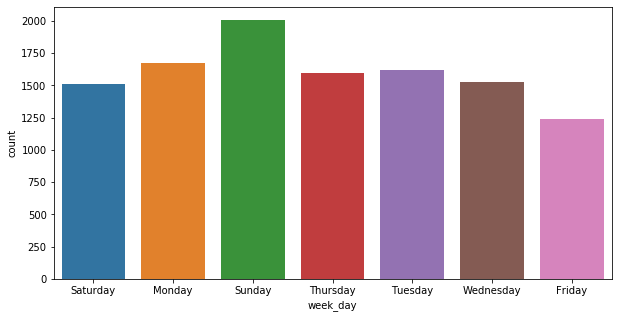

In [36]:
# Barplot for the count of likes on days of week
plt.figure(figsize=(10,5))
sns.countplot(df['week_day'])
plt.show()

- I have liked more number of post on **Sunday**, i.e. around 2007 likes
- I have liked less number of post on **Friday**, i.e. around 1237 likes

In [37]:
# Top 5 rows in the df1
df1.head()

,username,count
916,trolls_official,806
176,chaai_garam,479
966,wwe,462
20,_dekhbhai_,415
345,idiotic_sperm,359


In [38]:
# Resettin the index
df1.reset_index(inplace=True)
df1.drop('index',axis=1,inplace=True)
df1

,username,count
0,trolls_official,806
1,chaai_garam,479
2,wwe,462
3,_dekhbhai_,415
4,idiotic_sperm,359
...,...,...
975,natasha_romanoff,1
976,cricuniverse,1
977,cristy_lovelace,1
978,musclenbeachgymgoa,1


In [39]:
# To display all the rows
pd.set_option('display.max_rows', None)

In [40]:
# Displaying all the rows
df1

,username,count
0,trolls_official,806
1,chaai_garam,479
2,wwe,462
3,_dekhbhai_,415
4,idiotic_sperm,359
5,itscheche29,273
6,erumaliazad,257
7,lizamaman,220
8,just.indian.stuff,205
9,pooja_flabtofab,200


In [41]:
# To find no. of accounts with likes from 1 to 10 
c=[]
d=[]
for i in range(1,11):
    c.append((df1['count']==i).sum())
    d.append(i)
    
# Creating Data frame df2
e = {'No. of likes': d, 'Total no. of account': c}
df2 = pd.DataFrame(data=e)

In [42]:
df2

,No. of likes,Total no. of account
0,1,474
1,2,118
2,3,62
3,4,33
4,5,33
5,6,20
6,7,20
7,8,13
8,9,15
9,10,10


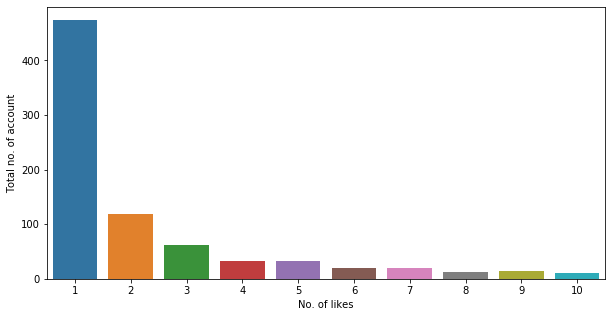

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x=df2['No. of likes'],y=df2['Total no. of account'])
plt.show()

**Tried this for some handson practice, Please suggest if any thing could be dont extra or differently.**